In [1]:
import numpy as np
import numpy.random as npr 
import matplotlib.pyplot as plt

## Different methods for bootstrap-CI

In [39]:
X = npr.randint(30,40,10)
np.mean(X)

34.0

In [40]:
boot_samples = npr.choice(X, size = (100, len(X)), replace = True)

In [41]:
# 1. Percentile bootstrap

boot_mean = np.mean(boot_samples, axis = 1)
np.percentile(boot_mean, (0.05,0.95))

array([31.9099, 32.0881])

In [42]:
# 2. Basic Bootstrap 

boot_d = npr.choice(X-np.mean(X), size = (100, len(X)), replace = True)

boot_meand = np.mean(boot_d, axis = 1)
np.mean(X) + np.percentile(boot_meand, (0.05,0.95))

array([31.32475, 31.77025])

In [43]:
# 3. t-bootstrap

boot_mean = np.mean(boot_samples, axis = 1)
boot_std = np.std(boot_samples, axis = 1)

t = (boot_mean - np.mean(X))/boot_std

In [44]:
np.mean(X) + np.percentile(t, (0.05,0.95))*np.std(X)/np.sqrt(len(X))

array([32.6612615, 33.0392622])

## Sharp Ratio

In [46]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
from arch.bootstrap import IIDBootstrap

In [47]:
start = dt.datetime(1951,1,1)
end = dt.datetime(2022,1,1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)

In [50]:
montly_dates = pd.date_range(sp500.index.min(),sp500.index.max(),freq='M')
mothly_data = sp500.reindex(montly_dates, method='ffill')

In [52]:
returns = 100*mothly_data['Adj Close'].pct_change().dropna()

In [60]:
# plt.hist(returns)


In [53]:
def sharp(x):
    mu, sigma = 12*x.mean(), np.sqrt(12*x.var())
    return mu/sigma

In [54]:
bs = IIDBootstrap(returns)

In [55]:
bs.conf_int(sharp, 1000, method='percentile')

array([[0.36569355],
       [0.84575357]])

In [56]:
bs.conf_int(sharp, 1000, method='basic')

array([[0.3524351 ],
       [0.83373683]])

In [57]:
bs.conf_int(sharp, 1000, method='norm')

array([[0.36128213],
       [0.84150901]])

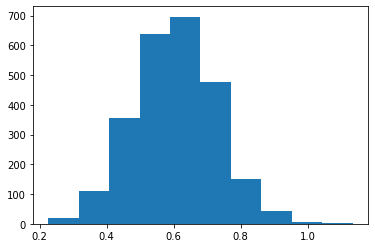

In [62]:
plt.hist(bs.apply(sharp,2500));
